# Graph Plots

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import warnings

plt.style.use('ggplot')
np.random.seed(37)
warnings.filterwarnings('ignore')

## Basic undirected graph

Look at the [API documentation](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html) for more options.

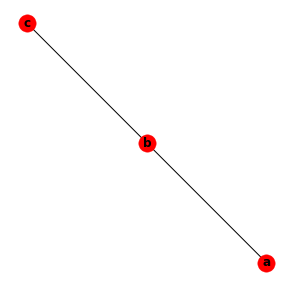

In [2]:
g = nx.Graph()

g.add_node('a')
g.add_node('b')
g.add_node('c')

g.add_edge('a', 'b')
g.add_edge('b', 'c')

fig, ax = plt.subplots(figsize=(5, 5))

nx.draw(g, with_labels=True, font_weight='bold', node_color='r', ax=ax)

## Basic directed graph

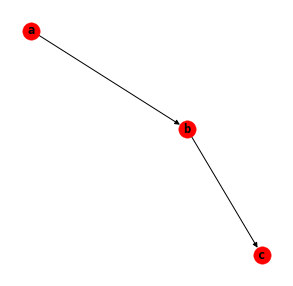

In [3]:
g = nx.DiGraph()

g.add_node('a')
g.add_node('b')
g.add_node('c')

g.add_edge('a', 'b')
g.add_edge('b', 'c')

fig, ax = plt.subplots(figsize=(5, 5))

nx.draw(g, with_labels=True, font_weight='bold', font_family='monospace', node_color='r', ax=ax)

## Styling nodes and edges

Look at the API references below for more options.

* [draw_networkx_nodes](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_nodes.html)
* [draw_networkx_edges](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_edges.html)
* [draw_networkx_labels](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_labels.html)
* [draw_networkx_edge_labels](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_edge_labels.html)
* [arrow style](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.ArrowStyle.html)

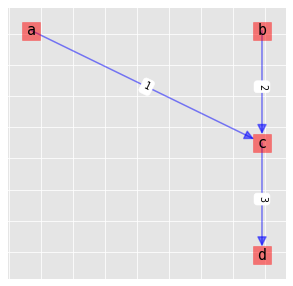

In [4]:
g = nx.DiGraph()

g.add_node('a')
g.add_node('b')
g.add_node('c')
g.add_node('d')

g.add_edge('a', 'c', weight=1)
g.add_edge('b', 'c', weight=2)
g.add_edge('c', 'd', weight=3)

fig, ax = plt.subplots(figsize=(5, 5))

pos = nx.nx_agraph.graphviz_layout(g, prog='dot', args='-Kdot')

params = {
    'node_color': 'r',
    'node_size': 350,
    'node_shape': 's',
    'alpha': 0.5,
    'pos': pos,
    'ax': ax
}
_ = nx.drawing.nx_pylab.draw_networkx_nodes(g, **params)

params = {
    'font_size': 15,
    'font_color': 'k',
    'font_family': 'monospace',
    'pos': pos,
    'ax': ax
}
_ = nx.drawing.nx_pylab.draw_networkx_labels(g, **params)

params = {
    'width': 1.5,
    'alpha': 0.5,
    'edge_color': 'b',
    'arrowsize': 20,
    'pos': pos,
    'ax': ax
}
_ = nx.drawing.nx_pylab.draw_networkx_edges(g, **params)

params = {
    'edge_labels': {e: g.edges[e]['weight'] for e in g.edges()},
    'font_family': 'monospace',
    'pos': pos,
    'ax': ax
}
_ = nx.drawing.nx_pylab.draw_networkx_edge_labels(g, **params)

## Layouts with Matplotlib

In [5]:
def add_edges(g, node_id, n):
    for i in range(n):
        g.add_edge(node_id, f'{node_id}{i}')
        
g = nx.DiGraph()

g.add_edge('a', 'c')
g.add_edge('b', 'c')
g.add_edge('c', 'd')
g.add_edge('d', 'e')

add_edges(g, 'a', 5)
add_edges(g, 'b', 5)
add_edges(g, 'c', 5)
add_edges(g, 'd', 10)

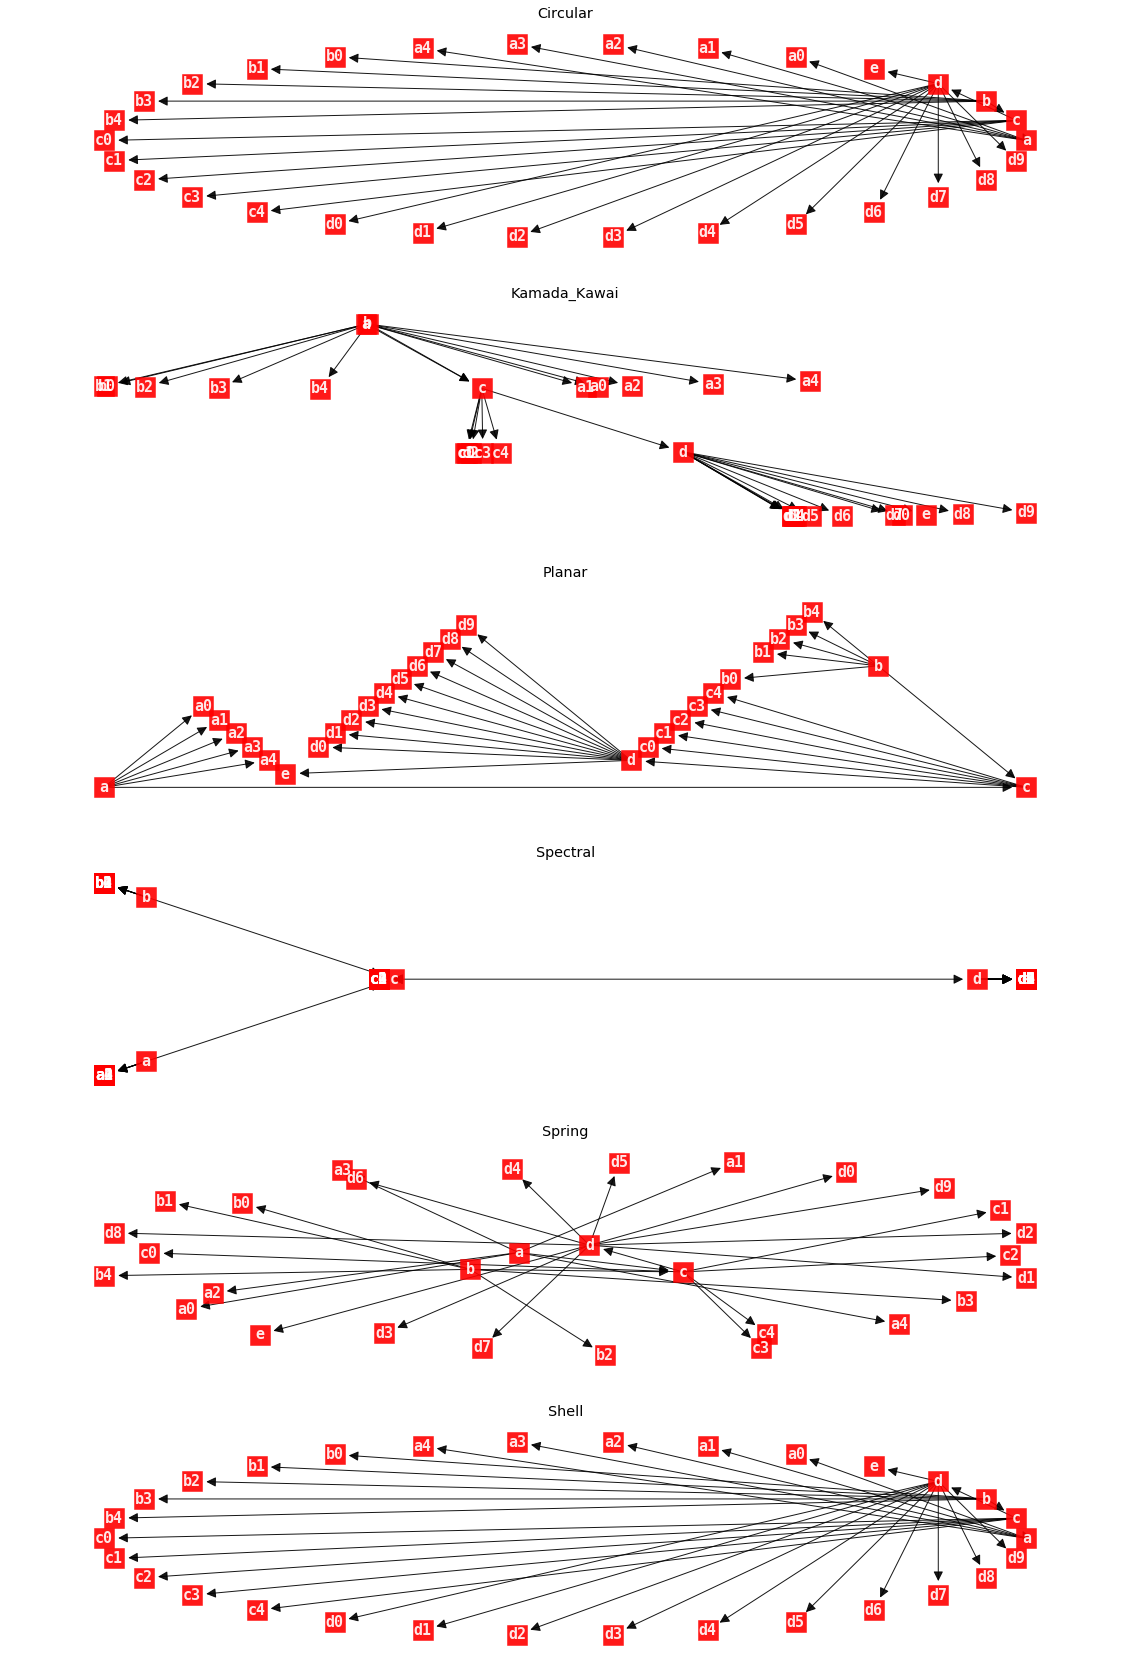

In [6]:
import copy

fig, axes = plt.subplots(6, 1, figsize=(20, 30))
axes = np.ravel(axes)

params = {
    'with_labels': True,
    'font_color': 'w',
    'font_family': 'monospace',
    'font_weight': 'bold',
    'font_size': 15,
    'node_color': 'r',
    'node_shape': 's',
    'node_size': 400,
    'arrowsize': 20,
    'arrowstyle': '-|>',
    'alpha': 0.9
}

drawing_names = [
    'Circular',
    'Kamada_Kawai',
    'Planar',
    'Spectral',
    'Spring',
    'Shell'
]
drawing_functions = [
    nx.drawing.nx_pylab.draw_circular,
    nx.drawing.nx_pylab.draw_kamada_kawai,
    nx.drawing.nx_pylab.draw_planar,
    nx.drawing.nx_pylab.draw_spectral,
    nx.drawing.nx_pylab.draw_spring,
    nx.drawing.nx_pylab.draw_shell
]

for name, f, ax in zip(drawing_names, drawing_functions, axes):
    p = copy.deepcopy(params)
    p['ax'] = ax
    
    f(g, **p)
    _ = ax.set_title(name)

## Layouts with dot

* [dot layouts](https://graphviz.gitlab.io/_pages/doc/info/command.html): circo, dot, fdp, neato, nop, nop1, nop2, osage, patchwork, sfdp, twopi
* [colors](https://matplotlib.org/2.0.2/api/colors_api.html)

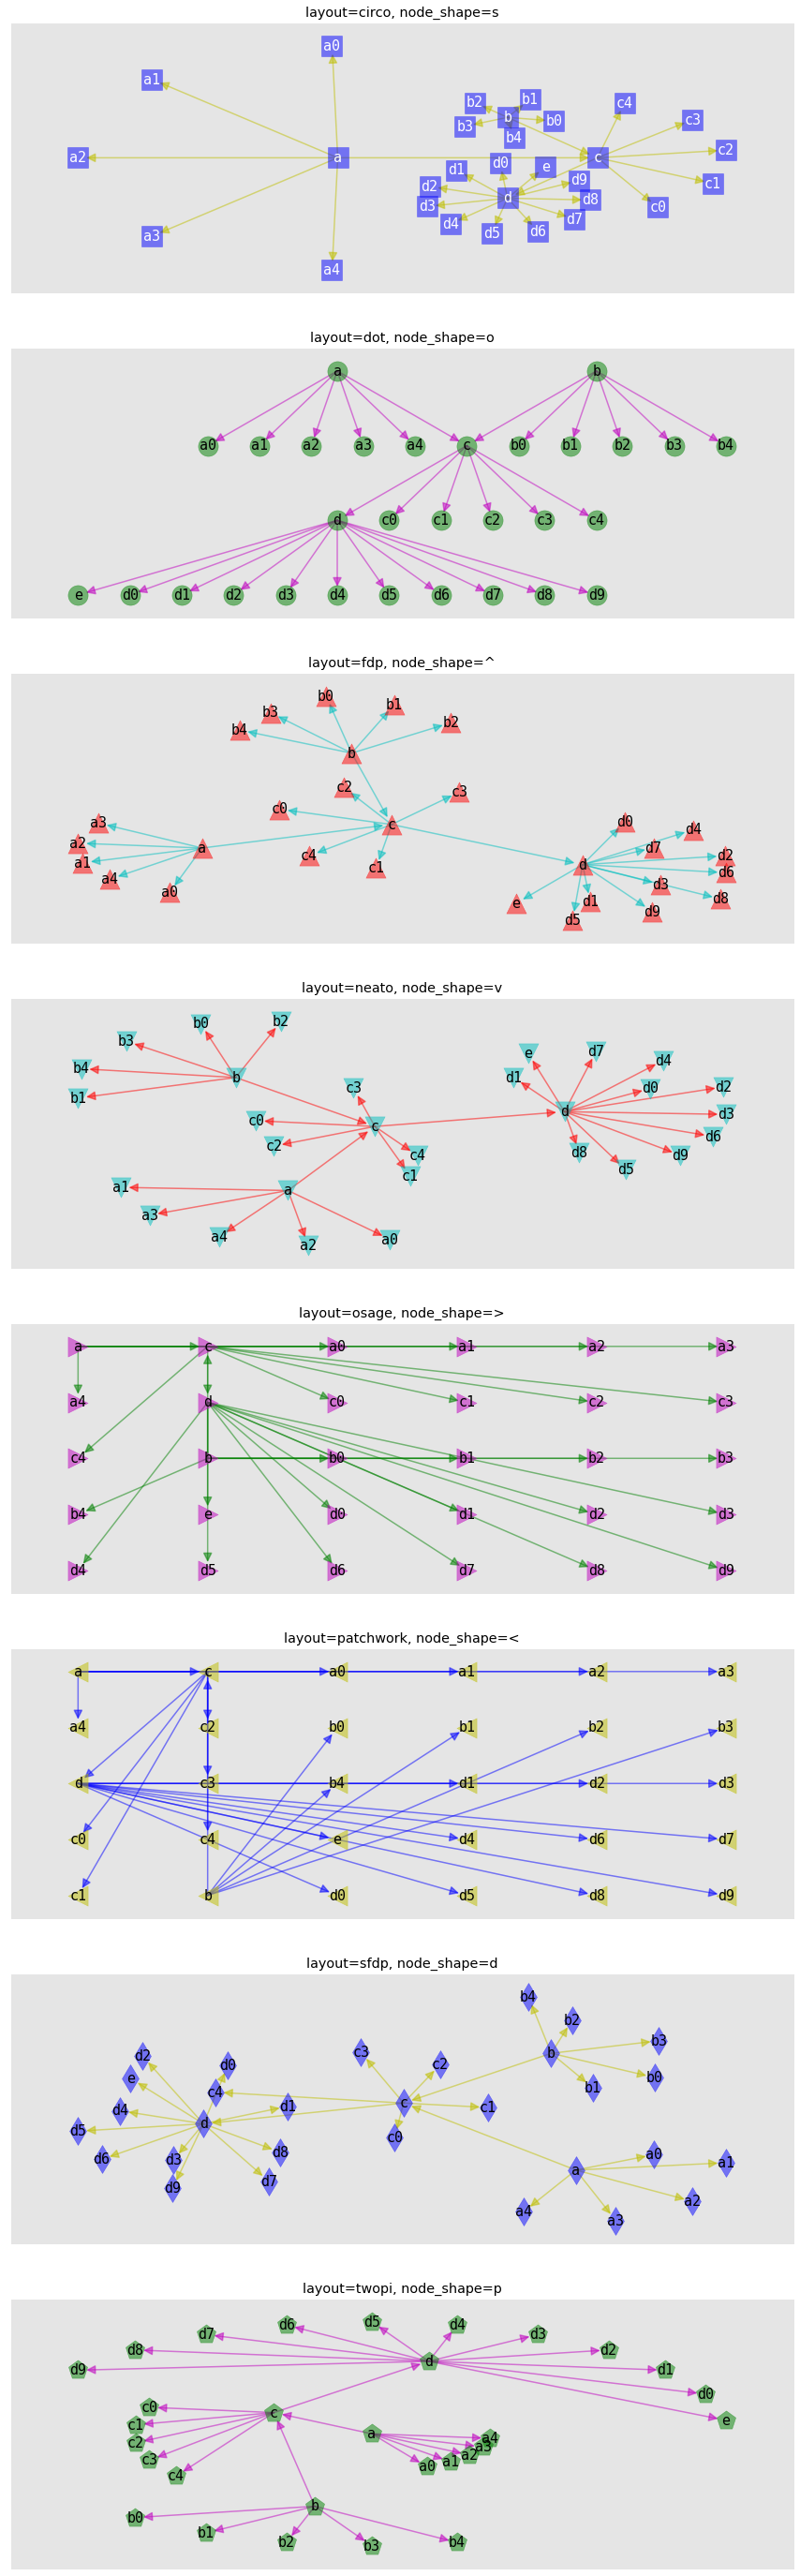

In [7]:
from itertools import cycle

g = nx.DiGraph()

g.add_edge('a', 'c')
g.add_edge('b', 'c')
g.add_edge('c', 'd')
g.add_edge('d', 'e')

add_edges(g, 'a', 5)
add_edges(g, 'b', 5)
add_edges(g, 'c', 5)
add_edges(g, 'd', 10)

layouts = ['circo', 'dot', 'fdp', 'neato', 'osage', 'patchwork', 'sfdp', 'twopi']
positions = [nx.nx_agraph.graphviz_layout(g, prog='dot', args=f'-K{layout}') for layout in layouts]
node_shapes = cycle('so^v><dp')
node_colors = cycle('bgrcmy')
edge_colors = cycle('ymcrgb')
font_colors = 'wkkkkkkk'

fig, axes = plt.subplots(len(layouts), 1, figsize=(15, 50))
axes = np.ravel(axes)

for layout, pos, node_shape, node_color, edge_color, font_color, ax in zip(layouts, positions, node_shapes, node_colors, edge_colors, font_colors, axes):
    params = {
        'node_color': node_color,
        'node_size': 450,
        'node_shape': node_shape,
        'alpha': 0.5,
        'pos': pos,
        'ax': ax
    }
    _ = nx.drawing.nx_pylab.draw_networkx_nodes(g, **params)

    params = {
        'font_size': 15,
        'font_color': font_color,
        'font_family': 'monospace',
        'pos': pos,
        'ax': ax
    }
    _ = nx.drawing.nx_pylab.draw_networkx_labels(g, **params)

    params = {
        'width': 1.5,
        'alpha': 0.5,
        'edge_color': edge_color,
        'arrowsize': 20,
        'pos': pos,
        'ax': ax
    }
    _ = nx.drawing.nx_pylab.draw_networkx_edges(g, **params)
    
    _ = ax.set_title(f'layout={layout}, node_shape={node_shape}')
    _ = ax.axes.get_xaxis().set_visible(False)
    _ = ax.axes.get_yaxis().set_visible(False)